# Green AI project : Water polution

## I - Importations

In [1091]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## II - Adding the dataset

In [1092]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
target = pd.read_csv("Target.csv")
submission = pd.read_csv("Submission.csv")

In [1093]:
train.head()

,Unnamed: 0,code,year,period,id,Country,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling
0,6,CAS_7723-14-0,2009,2009-01--2009-12,ES014MSPFES-014-NR-038-000-02-02,Spain,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84
1,10,CAS_7723-14-0,2009,2009-01--2009-12,FRGR0220,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
2,17,CAS_14265-44-2,2009,2009-01--2009-12,FRGR1496,France,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
3,24,CAS_7723-14-0,2009,2009-01--2009-12,FRDR174,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
4,34,CAS_7723-14-0,2009,2009-01--2009-12,FRGR1022,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26


### Adding the test set and the targets

In [1094]:
df = pd.concat([train, test])
targets = pd.concat([target, submission])

df['polution'] = targets['polution']
df = df.drop(columns = ['Unnamed: 0'])
df = df.drop(columns= ['period'])
df.head()

df_copy = df


## III -  Data cleaning

### Informations about the dataset

In [1095]:
print("DataFrame shape : ",train.shape)

DataFrame shape :  (2318, 18)


In [1096]:
print("Column name dictionnary : ")
column_names_dict = {column: index for index, column in enumerate(train.columns)}
print(column_names_dict)

Column name dictionnary : 
{'Unnamed: 0': 0, 'code': 1, 'year': 2, 'period': 3, 'id': 4, 'Country': 5, 'tourists': 6, 'venue': 7, 'rate': 8, 'food': 9, 'glass': 10, 'metal': 11, 'other': 12, 'paper': 13, 'plastic': 14, 'leather': 15, 'green_waste': 16, 'waste_recycling': 17}


### Searching for missing values

In [1097]:
def cheking_for_missing_values() : 
    missing_values = train.isnull().sum()
    print("\nTotal missing values in each column:")
    print(missing_values)

cheking_for_missing_values()


Total missing values in each column:
Unnamed: 0          0
code                0
year                0
period              0
id                  0
Country            17
tourists            0
venue               0
rate                0
food                0
glass               0
metal               0
other               0
paper               0
plastic             0
leather             0
green_waste         0
waste_recycling     0
dtype: int64


In [1098]:
train = train.dropna()
cheking_for_missing_values()


Total missing values in each column:
Unnamed: 0         0
code               0
year               0
period             0
id                 0
Country            0
tourists           0
venue              0
rate               0
food               0
glass              0
metal              0
other              0
paper              0
plastic            0
leather            0
green_waste        0
waste_recycling    0
dtype: int64


### Encode the string values

#### Encode the Country column

In [1099]:
# We create a mapping of the countries and add the column 'Country_mapped' to the dataset
countries = df['Country'].unique()
mapping_country = {value: i+1 for i, value in enumerate(countries)}
df['Country_mapped'] = df['Country'].map(mapping_country)

# Then we insert it next to the 'Country' column and drop the 'Country' column
colonne = df.pop('Country_mapped')
df.insert(4, 'Country_mapped', colonne)
df = df.drop(columns= ['Country'])

df.head()

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
0,CAS_7723-14-0,2009,ES014MSPFES-014-NR-038-000-02-02,1,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84,0.013212
1,CAS_7723-14-0,2009,FRGR0220,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.057482
2,CAS_14265-44-2,2009,FRGR1496,2,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037835
3,CAS_7723-14-0,2009,FRDR174,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.055119
4,CAS_7723-14-0,2009,FRGR1022,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037617


#### Encode the 'id' and 'code' column

In [1100]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['id'] = le.fit_transform(df['id'])
df['code'] = le.fit_transform(df['code'])

df.head()

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
0,1,2009,160,1,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84,0.013212
1,1,2009,852,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.057482
2,0,2009,977,2,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037835
3,1,2009,501,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.055119
4,1,2009,969,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037617


### Drop any duplicate

In [1101]:
train.drop_duplicates(inplace=True)

### Delete the extrems values

#### Boxplot

In [1102]:
df.head()

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
0,1,2009,160,1,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84,0.013212
1,1,2009,852,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.057482
2,0,2009,977,2,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037835
3,1,2009,501,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.055119
4,1,2009,969,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037617


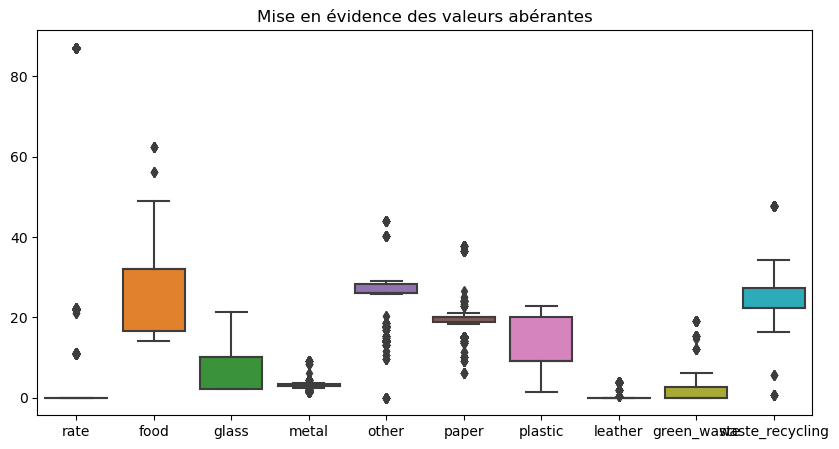

<Figure size 1200x200 with 0 Axes>

In [1103]:
subset_df = df[['rate','food','glass','metal','other','paper','plastic','leather','green_waste','waste_recycling']]

plt.figure(figsize=(10, 5))
sns.boxplot(data = subset_df)
plt.title('Mise en évidence des valeurs abérantes')
plt.figure(figsize=(12,2))
plt.show()

#### Delete extrem values

We decide to exclude the countries in deleting the extrem values so that we keep country diversity

In [1104]:
Q1 = df.drop(columns=['Country_mapped','polution','venue','leather','rate']).quantile(0.10)
Q3 = df.drop(columns=['Country_mapped','polution','venue','leather','rate']).quantile(0.90)
IQR = Q3 - Q1

# Utilisez la méthode loc pour filtrer les lignes sur les colonnes spécifiques
df = df.loc[~((df.drop(columns=['Country_mapped','polution','venue','leather','rate']) < (Q1 - 1.5 * IQR)) | (df.drop(columns=['Country_mapped','polution','venue','leather','rate']) > (Q3 + 1.5 * IQR))).any(axis=1)]

In [1105]:
venue_before = df_copy['venue'].unique()
venue_after = df['venue'].unique()

leather_before = df_copy['leather'].unique()
leather_after = df['leather'].unique()

rate_before = df_copy['rate'].unique()
rate_after = df['rate'].unique()

print(f'Venue before : {venue_before} and after {venue_after}\nLeather before {leather_before} and after {leather_after}\nRate before {rate_before} and after {rate_after}')

Venue before : [4. 0. 5. 1. 3. 2. 7. 6.] and after [4. 0. 5. 1. 3. 6. 2.]
Leather before [0.   1.96 4.   0.4  3.6 ] and after [0.]
Rate before [87.15892368  0.         10.92804972 11.09062195 22.00044929 11.09255897
 21.17940436 21.86710188 22.19835663 11.01392873 21.93875376] and after [87.15892368  0.         11.09062195 22.00044929 21.17940436 11.01392873
 21.93875376]


#### Boxplot after taking out the extrem values

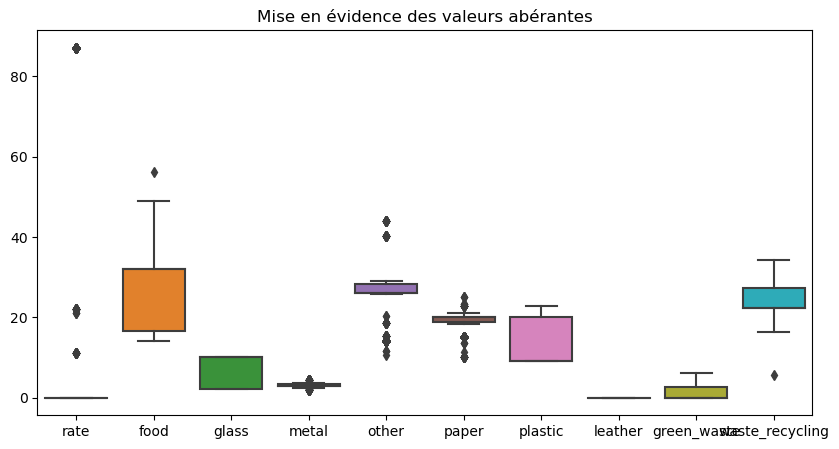

<Figure size 1200x200 with 0 Axes>

In [1106]:
subset_df = df[['rate','food','glass','metal','other','paper','plastic','leather','green_waste','waste_recycling']]

plt.figure(figsize=(10, 5))

sns.boxplot(data = subset_df)
plt.title('Mise en évidence des valeurs abérantes')
plt.figure(figsize=(12,2))
plt.show()

In [1107]:
df = df.drop(columns=['leather'])

##  IV - Data visualisation

### a - Pie of countries

#### Take back the Country column

In [1108]:
# Create a function to inverte the mapping we did in the cleaning step
def invert_mapping(mapping):
    return {v: k for k, v in mapping.items()}

# Invert the mapping using the function we just did
inverted_mapping = invert_mapping(mapping_country)

# Create a columns with the countries using the mapping 
Country = [inverted_mapping[valeur] for valeur in df['Country_mapped']]

#Adding the new column to the dataset df
df['Country'] = Country

df.head()


,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,green_waste,waste_recycling,polution,Country
0,1,2009,160,1,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,16.84,0.013212,Spain
1,1,2009,852,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.057482,France
2,0,2009,977,2,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.037835,France
3,1,2009,501,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.055119,France
4,1,2009,969,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.037617,France


#### Plot the Pie

In [1109]:
count_country = df['Country'].value_counts()

limit = 10
count_country['Others < 10'] = count_country[count_country < limit].sum()
count_country = count_country[count_country >= limit]

fig = px.pie(count_country, values=count_country.values, names=count_country.index, 
             title='Diagram of the country repartition')

fig.show()

### b - Visualisation of the mean pollution for each country with indicated the number of values per country 

In [1110]:
df.head()

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,green_waste,waste_recycling,polution,Country
0,1,2009,160,1,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,16.84,0.013212,Spain
1,1,2009,852,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.057482,France
2,0,2009,977,2,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.037835,France
3,1,2009,501,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.055119,France
4,1,2009,969,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.037617,France


In [1112]:
average_pollution = df.groupby('Country')['polution'].mean().reset_index()

fig = px.bar(average_pollution, x='Country', y='polution',
             title='Mean pollution per country')

fig.update_layout(xaxis_tickangle=-45, xaxis_title='Country', yaxis_title='Mean pollution')

fig.show()

### c - Average polution by years

In [1113]:
average_pollution_by_year = df.groupby('year')['polution'].mean().reset_index()

fig = px.line(average_pollution_by_year, x='year', y='polution', 
              title='Pollution evolution by years', markers=True)

fig.update_layout(xaxis_title='Year', yaxis_title='Mean pollution', showlegend=False)

fig.show()

year_counts = df['year'].value_counts().reset_index()
year_counts.columns = ['Year', 'Count']

fig = px.pie(year_counts, values='Count', names='Year', 
             title='Year distribution', hole=0.4)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

### d - Barplot type of polution

In [1114]:
df.head()

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,green_waste,waste_recycling,polution,Country
0,1,2009,160,1,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,16.84,0.013212,Spain
1,1,2009,852,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.057482,France
2,0,2009,977,2,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.037835,France
3,1,2009,501,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.055119,France
4,1,2009,969,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.037617,France


In [1115]:
categories = ['glass', 'food', 'metal', 'other', 'paper', 'plastic', 'green_waste']
color = ['#264653', '#226D68', '#2A9D8F', '#E9C46A', '#F4A261', '#C23028', '#77221D']

average_by_country = df.groupby('Country')[categories].mean().reset_index()

fig = px.bar(average_by_country, x='Country', y=categories,
             color_discrete_sequence=color, title='Average Waste by Country')

fig.update_layout(xaxis_tickangle=-45, xaxis_title='Country', yaxis_title='Average Waste',
                  legend_title='Categories')

fig.show()

## V - Preparation for modeling

### a - Deleting the Country column used fot the visualisations

In [1116]:
df = df.drop(columns= ['Country'])
df.head()

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,green_waste,waste_recycling,polution
0,1,2009,160,1,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,16.84,0.013212
1,1,2009,852,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.057482
2,0,2009,977,2,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.037835
3,1,2009,501,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.055119
4,1,2009,969,2,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0.037617


In [1117]:
venue_before = df_copy['venue'].unique()
venue_after = df['venue'].unique()

print(f'Venue before : {venue_before} and after {venue_after}\nLeather before {leather_before} and after {leather_after}')

Venue before : [4. 0. 5. 1. 3. 2. 7. 6.] and after [4. 0. 5. 1. 3. 6. 2.]
Leather before [0.   1.96 4.   0.4  3.6 ] and after [0.]


### b - Heatmap

<Axes: >

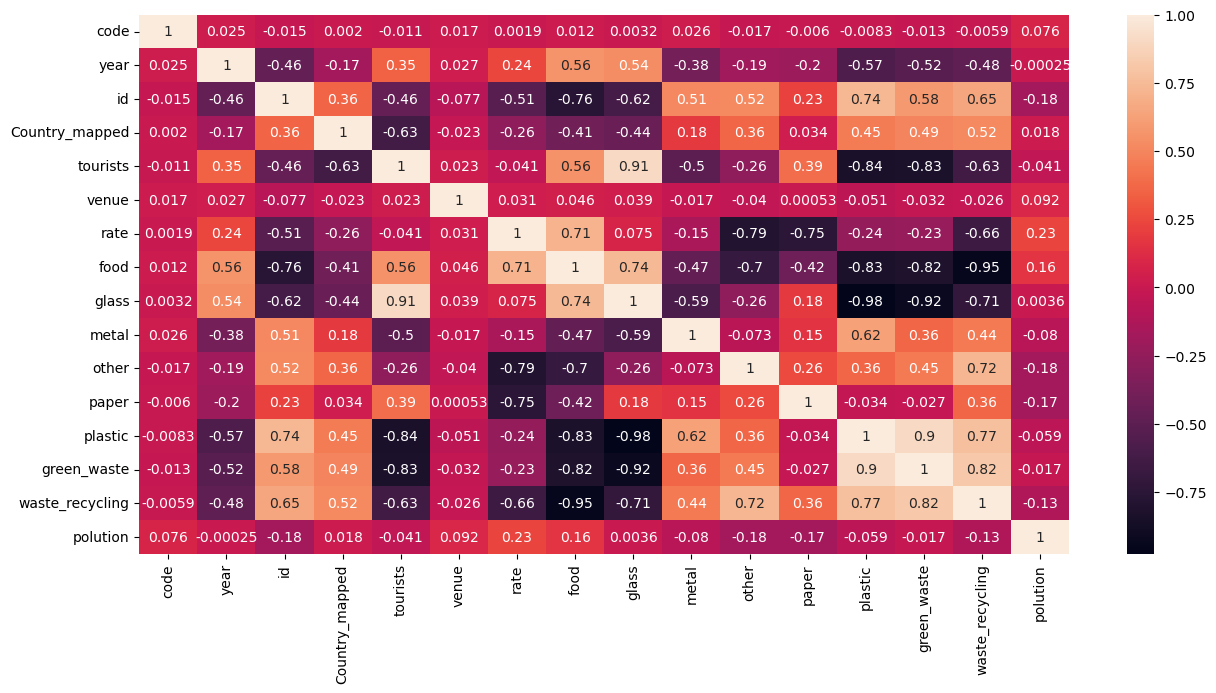

In [1118]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(),annot=True)


### b - Delete the columns with high correlation

In [1119]:
correlation_matrix = df.corr()

correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.92:
            colname = correlation_matrix.columns[i]
            correlated_columns.add(colname)
            
print(f'The columns we have to drop are : {correlated_columns}')
            
df_no_corr = df.drop(columns=correlated_columns)

The columns we have to drop are : {'plastic', 'waste_recycling'}


### e - Standardisation

In [1120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standardized = scaler.fit_transform(df)

In [1121]:
target = df['polution']
df = df.drop(columns=['polution'])

In [1122]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_standardized,target,train_size = 0.75,random_state=42)

In [1123]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

## VI - Modeling

#### Linear regression

In [1124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [1125]:
ML_pipeline = make_pipeline(PCA(n_components=2),LinearRegression())
ML_pipeline.fit(x_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('linearregression', LinearRegression())])